In [ ]:
!pip install newspaper3k transformers gradio --quiet 

     |████████████████████████████████| 211 kB 5.4 MB/s 
     |████████████████████████████████| 2.9 MB 39.0 MB/s 
     |████████████████████████████████| 3.6 MB 30.7 MB/s 
     |████████████████████████████████| 7.4 MB 35.2 MB/s 
     |████████████████████████████████| 87 kB 5.4 MB/s 
     |████████████████████████████████| 81 kB 8.4 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 895 kB 41.0 MB/s 
     |████████████████████████████████| 3.3 MB 40.8 MB/s 
     |████████████████████████████████| 596 kB 46.6 MB/s 
     |████████████████████████████████| 206 kB 34.6 MB/s 
     |████████████████████████████████| 1.9 MB 45.8 MB/s 
     |████████████████████████████████| 63 kB 2.5 MB/s 
     |████████████████████████████████| 961 kB 49.9 MB/s 
     |████████████████████████████████| 3.5 MB 37.9 MB/s 


## Load libraries

In [ ]:
from newspaper import Article
from newspaper import Config
import nltk
nltk.download('punkt')

from transformers import pipeline
import gradio as gr
from gradio.mix import Parallel, Series

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
USER_AGENT = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:78.0) Gecko/20100101 Firefox/78.0'

config = Config()
config.browser_user_agent = USER_AGENT
config.request_timeout = 10

url = 'https://www.technologyreview.com/2021/07/09/1028140/ai-voice-actors-sound-human/'
article = Article(url, config=config)

## Download the article

In [ ]:
article.download() 

In [ ]:
article.html

'<!doctype html>\n<html lang="en" lang="en" style="\n            overflow: ;\n          " >\n<head>\n    <meta charset="utf-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\n    <title data-react-helmet="true">AI voice actors sound more human than ever—and are ready to hire | MIT Technology Review</title>\n    <meta data-react-helmet="true" name="description" content="A new wave of startups are using deep learning to build synthetic voice actors for digital assistants, video-game characters, and corporate videos."/><meta data-react-helmet="true" name="keywords" content=""/><meta data-react-helmet="true" property="og:url" content="https://www.technologyreview.com/2021/07/09/1028140/ai-voice-actors-sound-human/"/><meta data-react-helmet="true" property="og:type" content="article"/><meta data-react-helmet="true" property="og:title" content="AI voice actors sound more human than ever—and they’re ready to hire"/><meta data-react-helmet="true" p

## Parse information from article

In [ ]:
article.parse() 

authors = ", ".join(author for author in article.authors)
title = article.title
date = article.publish_date
text = article.text
image = article.top_image
videos = article.movies
url = article.url

In [ ]:
print("Information about the article")
print("=" * 30)
print(f"Title: {title}")
print(f"Author(s): {authors}")
print(f"Publish date: {date}")
print(f"Image: {image}")
print(f"Videos: {videos}")
print(f"Article link: {url}")
print(f"Content: {text[:100] + '...'}")

Information about the article
Title: AI voice actors sound more human than ever—and they’re ready to hire
Author(s): Karen Hao
Publish date: 2021-07-09 00:00:00
Image: https://wp.technologyreview.com/wp-content/uploads/2021/07/AIAudioActor-2.jpg?resize=1200,600
Videos: []
Article link: https://www.technologyreview.com/2021/07/09/1028140/ai-voice-actors-sound-human/
Content: The company blog post drips with the enthusiasm of a ’90s US infomercial. WellSaid Labs describes wh...


## NLP from article

In [ ]:
article.nlp()

In [ ]:
keywords = article.keywords
keywords.sort()
print(keywords)

['actors', 'ai', 'audio', 'certainly', 'clients', 'companies', 'different', 'everand', 'hire', 'human', 'ready', 'sound', 'theyre', 'voice', 'voices']


In [ ]:
keywords = "\n".join(keyw for keyw in keywords)

In [ ]:
print(f"Article Keywords: \n{keywords}")

Article Keywords: 
actors
ai
audio
certainly
clients
companies
different
everand
hire
human
ready
sound
theyre
voice
voices


### Newspaper library summary

In [ ]:
print(f"Summary: \n{article.summary}")

Summary: 
Unlike a recording of a human voice actor, synthetic voices can also update their script in real time, opening up new opportunities to personalize advertising.
Human voice actors, in particular, have been left to wonder what this means for their livelihoods.
Part of what makes a human voice so human is its inconsistency, expressiveness, and ability to deliver the same lines in completely different styles, depending on the context.
Capturing these nuances involves finding the right voice actors to supply the appropriate training data and fine-tune the deep-learning models.
Many of its clients use the synthesized voices only in pre-production and switch to real voice actors for the final production.


In [ ]:
text

'The company blog post drips with the enthusiasm of a ’90s US infomercial. WellSaid Labs describes what clients can expect from its “eight new digital voice actors!” Tobin is “energetic and insightful.” Paige is “poised and expressive.” Ava is “polished, self-assured, and professional.”\n\nEach one is based on a real voice actor, whose likeness (with consent) has been preserved using AI. Companies can now license these voices to say whatever they need. They simply feed some text into the voice engine, and out will spool a crisp audio clip of a natural-sounding performance.\n\nWellSaid Labs, a Seattle-based startup that spun out of the research nonprofit Allen Institute of Artificial Intelligence, is the latest firm offering AI voices to clients. For now, it specializes in voices for corporate e-learning videos. Other startups make voices for digital assistants, call center operators, and even video-game characters.\n\nNot too long ago, such deepfake voices had something of a lousy repu

## summarize with Hugging Face and Gradio

In [ ]:
io1 = gr.Interface.load('huggingface/sshleifer/distilbart-cnn-12-6')
io2 = gr.Interface.load("huggingface/facebook/bart-large-cnn")
io3 = gr.Interface.load("huggingface/google/pegasus-xsum")  
io4 = gr.Interface.load("huggingface/sshleifer/distilbart-cnn-6-6")                   

iface = Parallel(io1, io2, io3, io4,
                 theme='huggingface', 
                 inputs = gr.inputs.Textbox(lines = 10, label="Text"))

iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 72 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted
Running on External URL: https://21177.gradio.app


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://21177.gradio.app')

In [ ]:
def extract_article_text(url):
  USER_AGENT = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:78.0) Gecko/20100101 Firefox/78.0'
  config = Config()
  config.browser_user_agent = USER_AGENT
  config.request_timeout = 10

  article = Article(url, config=config)
  article.download()
  article.parse()
  text = article.text
  return text

In [17]:
extractor = gr.Interface(extract_article_text, 'text', 'text')
summarizer = gr.Interface.load("huggingface/facebook/bart-large-cnn")

sample_url = [['https://www.technologyreview.com/2021/07/22/1029973/deepmind-alphafold-protein-folding-biology-disease-drugs-proteome/'],
              ['https://www.technologyreview.com/2021/07/21/1029860/disability-rights-employment-discrimination-ai-hiring/'],
              ['https://www.technologyreview.com/2021/07/09/1028140/ai-voice-actors-sound-human/']]

desc =  '''
        Let Hugging Face models summarize articles for you. 
        Note: Shorter articles generate faster summaries.
        This summarizer uses bart-large-cnn model by Facebook
        '''

iface = Series(extractor, summarizer, 
  inputs = gr.inputs.Textbox(
      lines = 2,
      label = 'URL'
  ),
  outputs = 'text',
  title = 'News Summarizer',
  theme = 'huggingface',
  description = desc,
  examples=sample_url)

iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 72 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted
Running on External URL: https://18122.gradio.app


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7862/',
 'https://18122.gradio.app')

##Output

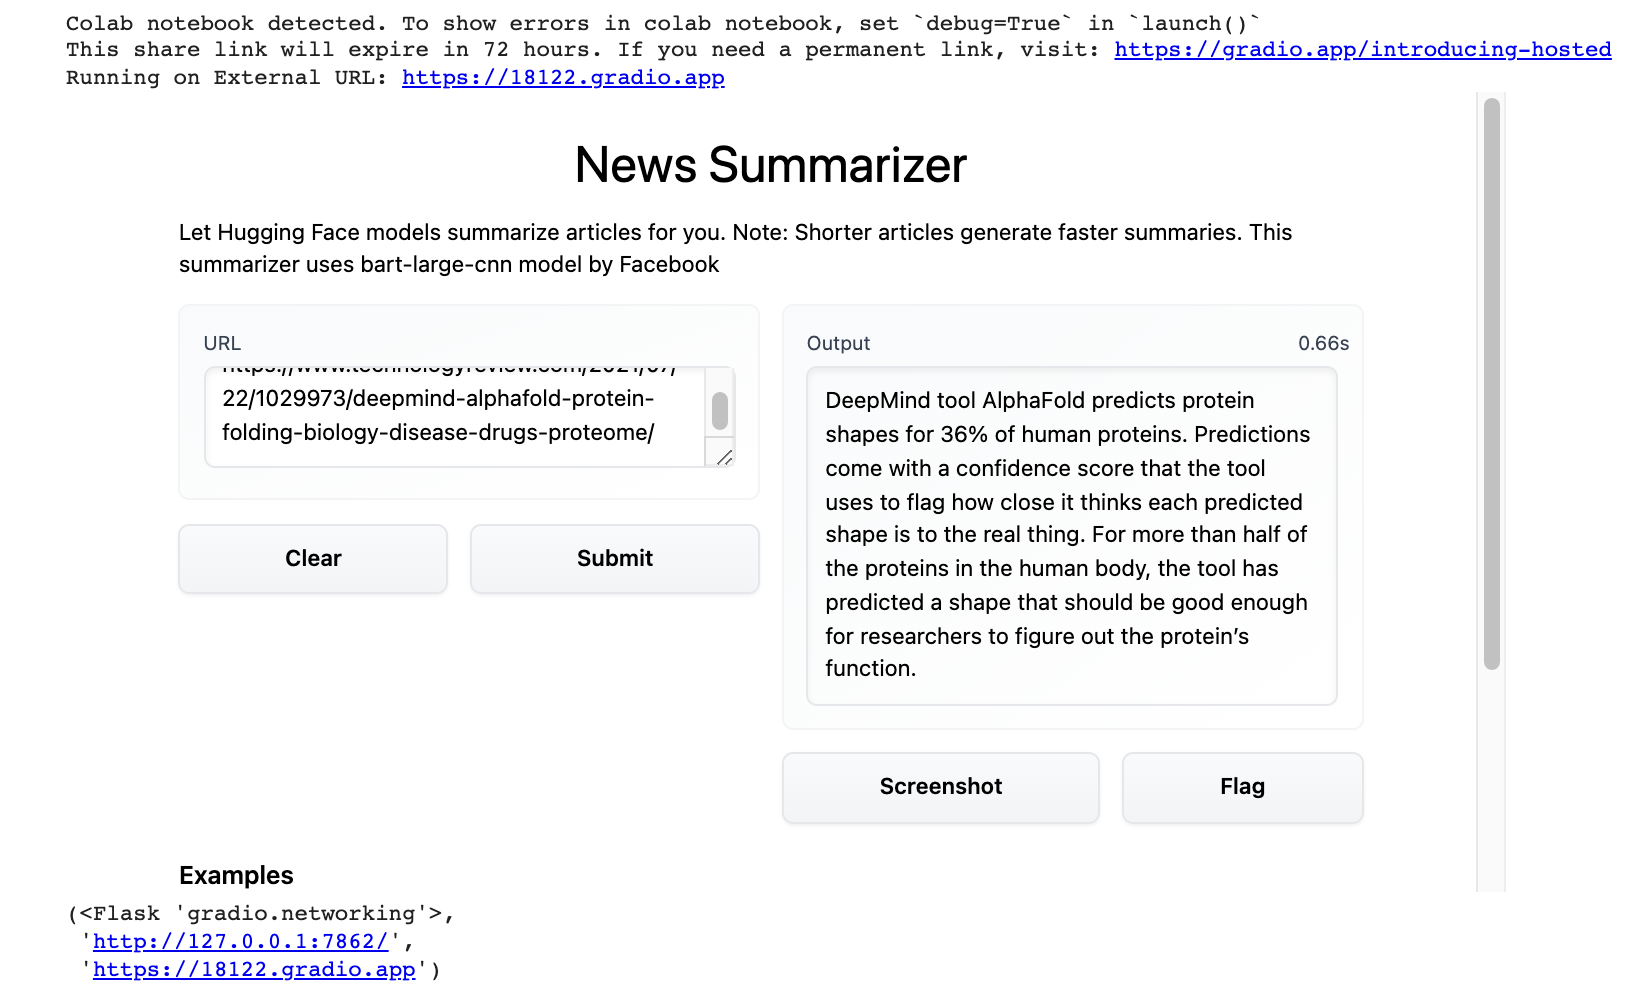